# **Booking Hotel Prediction**

This data set contains booking information for Resort Hotel and City Hotel and based on publications from sources (https://www.sciencedirect.com/science/article/pii/S2352340918315191) it is known that both hotels are located in Portugal (Southern Europe). More precisely, the Resort Hotel is located in the Resort Algarve area and the City Hotel is located in the city of Lisbon. The distance between these 2 locations is approx. 280km by car and the second visit location is in the North Atlantic.

The data is obtained from the hotel's Property Management System (PMS) server database by executing TSQL queries on SQL Server Studio Manager. This data set includes information such as when the booking was made, the booking for the stay, the number of adults, children, infants, the number of parking spaces available, etc.

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Load the data from dataset : "https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount"
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# General Information

In [ ]:
# Check information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

1. Dataset contains 32 columns and 119390 rows
2. The dataset is made up of 3 data types; float, integer and object
3. Column `reservation_status_date` has dtype object, which supposed to be a float feature, we will converted it

# Data Cleansing

## Missing Value Handling

In [ ]:
# Check missing value by count and percent
total = df.isna().sum()
percent = df.isna().sum() * 100 / len(df)
missing_value = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_value.head(32)

,Total,%
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


1. Input column `agent` with '0', because booking was most likely made without agency and missing values more than 5% based on proportion
2. Since missing data in `company` feature is too much I prefered to drop the whole feature
3. The column `children` and `country` we can simple drop, because missing values are small of proportion (< 5%)

In [ ]:
# Fill missing values of "agent" with "0"
df['agent'] = df['agent'].fillna(0)

## Drop Column and Missing Value

In [ ]:
# Drop column "company"
df = df.drop(['company'],axis = 1)

In [ ]:
# Drop missing values "children" and "country"
df = df.dropna()
# Check missing values after drop
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Success removing NULL values!

## Duplicated Values

In [ ]:
# Number of duplicated data
df.duplicated().sum()

31965

In [ ]:
# Drop duplicated values
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates()
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (118898, 31)
Data Frame Dimension After Duplicate Removal: (86933, 31)


In [ ]:
# Check information after handling duplicated values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86933 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86933 non-null  object 
 1   is_canceled                     86933 non-null  int64  
 2   lead_time                       86933 non-null  int64  
 3   arrival_date_year               86933 non-null  int64  
 4   arrival_date_month              86933 non-null  object 
 5   arrival_date_week_number        86933 non-null  int64  
 6   arrival_date_day_of_month       86933 non-null  int64  
 7   stays_in_weekend_nights         86933 non-null  int64  
 8   stays_in_week_nights            86933 non-null  int64  
 9   adults                          86933 non-null  int64  
 10  children                        86933 non-null  float64
 11  babies                          86933 non-null  int64  
 12  meal                           

1. Success removing duplicated values
2. After cleansing, dataset has 31 columns and 86933 rows

# Exploratory Data Analysis (EDA)

## Statistical Summary

In [ ]:
# Group column based on type
cats = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
nums = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [ ]:
# Numerical statistical summary
df[nums].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000,86933.000000
mean,0.275925,80.199257,2016.211841,26.840900,15.818182,1.007454,2.628898,1.878573,0.139222,0.010836,0.039237,0.030230,0.176722,0.271876,81.115664,0.753557,106.576656,0.083455,0.699481
std,0.446982,86.101083,0.686007,13.654282,8.834567,1.028776,2.043760,0.625850,0.456803,0.113597,0.194160,0.369589,1.717954,0.728116,109.946195,10.042218,54.956565,0.280412,0.831845
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


1. `is_canceled` and `is_repeated_guest` is boolean column (1 and 0)
2. Overall, the minimum and maximum values ​​make sense for each column
3. The `lead_time`, `agen` and `adr` columns show a positive skew distribution, because mean > median
4. The other colums except it showing a symmetrical distribution

In [ ]:
# Describe method on categorical data
df[cats].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14
freq,53416,11232,67555,27445,51540,69025,56183,46147,85789,71569,62946,211


1. The `country` column has a very large unique or more than 15, can be dropped if want to do modeling
2. Column `hotel` has 2 unique values, namely "City Hotel and Resort Hotel"
3. The other column has more than 2 unique with various values ​​from each column
4. Transform reservation_status_date column to datetime

In [ ]:
# Showing the precise value counts
for col in cats:
  print(f'value counts of {col} column')
  print(df[col].value_counts(), '\n')

value counts of hotel column
City Hotel      53416
Resort Hotel    33517
Name: hotel, dtype: int64 

value counts of arrival_date_month column
August       11232
July         10023
May           8342
April         7871
June          7753
March         7459
October       6883
September     6658
February      6042
December      5081
November      4951
January       4638
Name: arrival_date_month, dtype: int64 

value counts of meal column
BB           67555
SC            9474
HB            9056
Undefined      488
FB             360
Name: meal, dtype: int64 

value counts of country column
PRT    27445
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64 

value counts of market_segment column
Online TA        51540
Offline TA/TO    13857
Direct           11647
Groups            4937
Corporate         4027
Complementary      698
Aviation           227
Name: market_segment, 

1. Changing value "Undefined" to just "SC" in `meal` columns. Because, "Undefined" means that no meal package

In [ ]:
# Changing the value
df.loc[df['meal']=='Undefined','meal']='SC'
df['meal'].value_counts()

BB    67555
SC     9962
HB     9056
FB      360
Name: meal, dtype: int64

The values has been changed

## Univariate analysis

In [ ]:
# Group categoricals column based on information
catstype = ['hotel', 'meal', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
catsbooking = ['arrival_date_month', 'market_segment', 'distribution_channel', 'reservation_status']

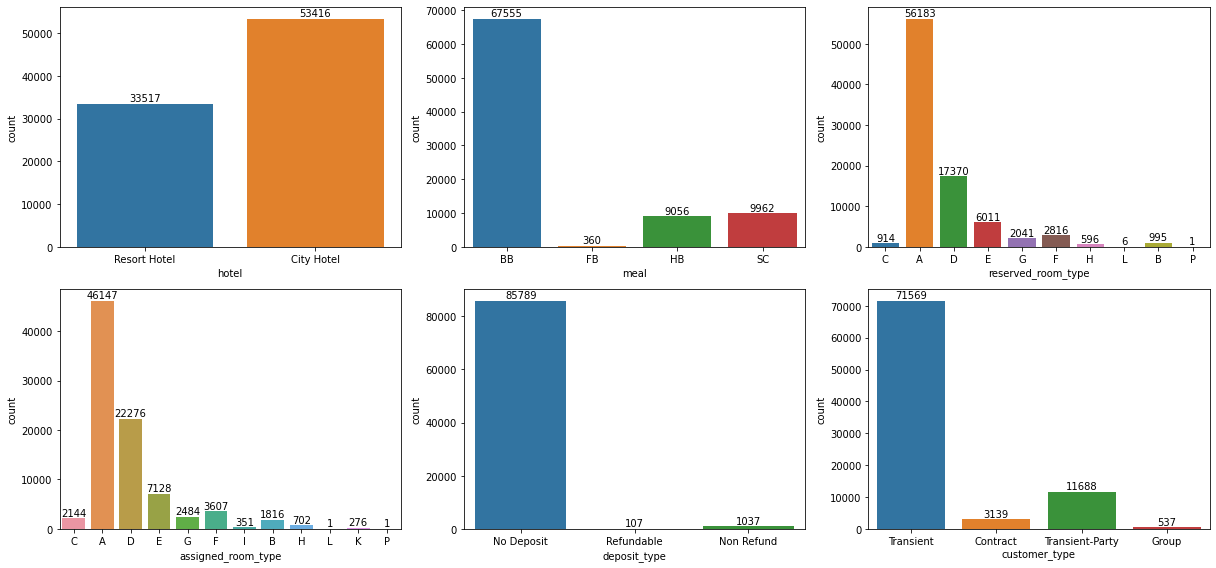

In [ ]:
from numpy.ma.core import count
# Check plotting for features of type categoricals
features = catstype
plt.figure(figsize=(17, 8))
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    ax = sns.countplot(data=df,
                       x=features[i])
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50), ha='center', va='bottom')
    
    plt.tight_layout()

1. Kolom `hotel`, distribusi terbanyak terdapat pada pemesanan `City Hotel` **60%** dibandingkan dengan `Resort hotel` **40%**, maka bisa dikatakan tamu yang datang kebanyakan bertujuan untuk keperluan bisnis, pertemuan, seminar serta untuk acara resmi perusahaan tetapi, tidak sedikit juga untuk distribusi pada `Resort Hotel` (33517), dimana tamu yang datang ingin berekreasi atau berwisata
2. Kolom `meal`, distribusi makanan yang dipesan terbanyak terdapat pada paket `BB` (Bed & Breakfast) yaitu sekitar **78%** dibandingkan dengan paket lainnya kemudian, untuk distribusi makanan pada `HB` dan `SC` memiliki distribusi yang serupa yaitu sekitar **10%** dan hanya sedikit untuk tamu yang menggunakan paket `FB`
3. Kolom `reserved_room_type` dan `assigned_room_type`, memiliki distribusi yang sama yaitu tipe kamar yang dipesan terbanyak pada tipe kamar `A` yaitu **+-55%**
4. Kolom `deposit_type`, distribusi terbanyak terdapat pada `No Deposit` yaitu sebanyak **99%** yang di identifikasi berdasarkan transaksi yang telah dilakukan oleh pemesan
5. Kolom `customer_type`, kategori terbanyak customer yang melakukan pemesanan yaitu pada kategori `Transient` sebanyak **82%** artinya, kebanyakan tamu yang datang langsung atau hanya orang-orang yang membutuhkan fasilitas masa inap jangka pendek

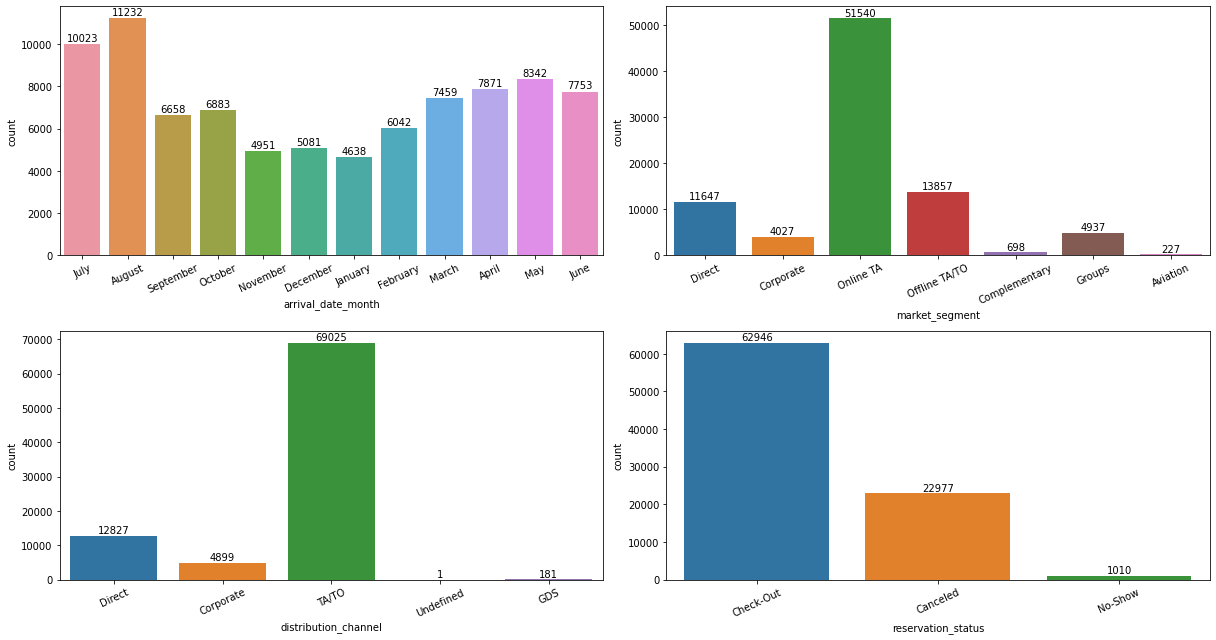

In [ ]:
# Check plotting for features of booking categoricals
features = catsbooking
plt.figure(figsize=(17, 9))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(data=df,
                       x=features[i])
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50), ha='center', va='bottom')
    plt.xticks(rotation=25)
    plt.tight_layout()

1. Kolom `arrival_date_month`, distribusi terbanyak pada bulan Agustus artinya, bulan tersebut merupakan bulan paling ramai dibandingkan dengan bulan Januari yang paling sedikit
2. Kolom `market_segment` dan `distribution_channel` memiliki distribusi yang sama, dimana customer yang menggunakan Online TA lebih banyak, yaitu lebih dari **70%** dibandingkan dengan lainnya
3. Kolom `reservation_status`, distribusi terbanyak pada status `Check-Out` yaitu sebanyak **72%** dan distribusi `Canceled` yaitu sebanyak **26%**. artinya seperti yang kita lihat ada banyak pembatalan

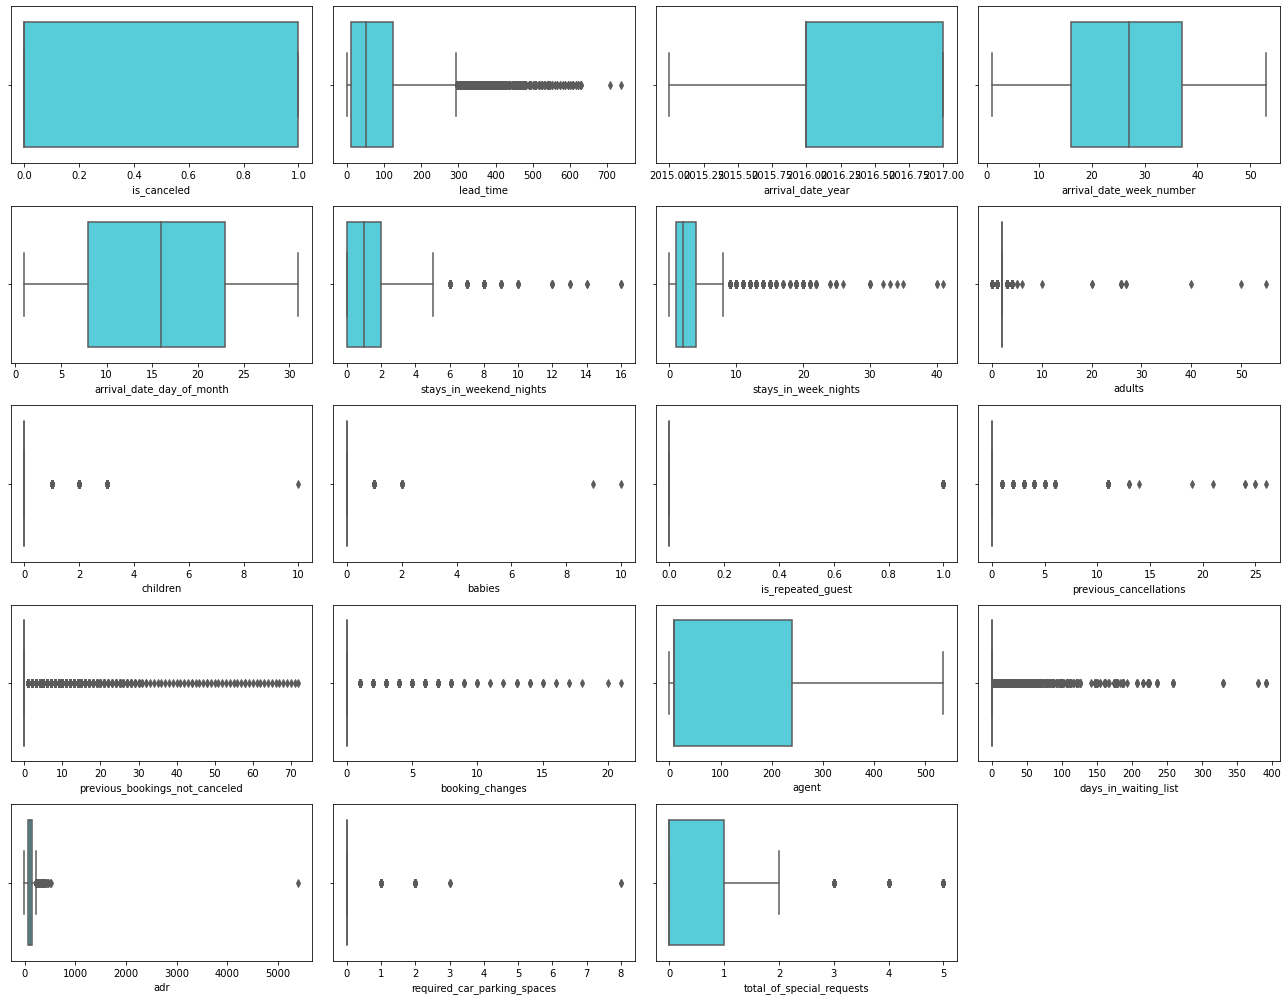

In [ ]:
# Check plotting for features of numericals
plt.figure(figsize=(18, 14))
features = nums
for i in range(0, len(features)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df[features[i]], color='#40DFEF')
    plt.tight_layout()

Many column have handful outliers. But, the outliers are still "normal" (not too extreme). I.e. no need to drop them

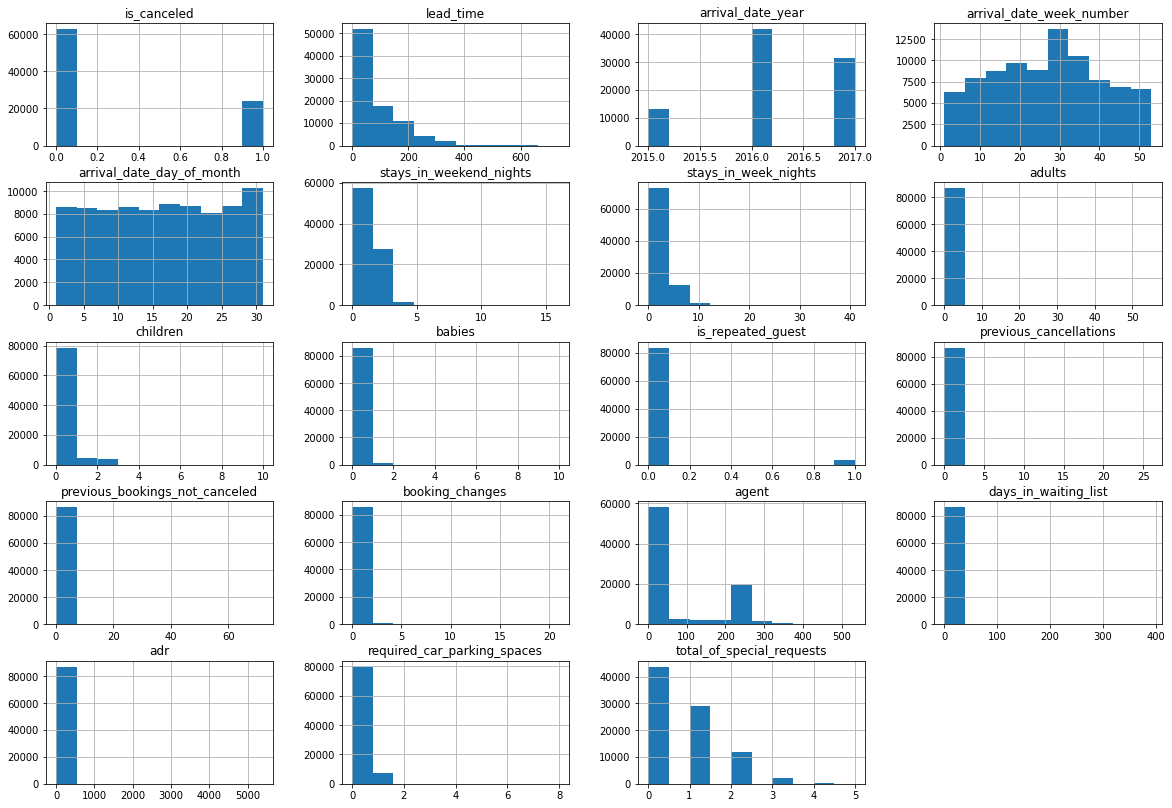

In [ ]:
# Check distibution for features of numericals
df[nums].hist(figsize=(20,14))
plt.show()

## Bivariate / Multivariate Analysis

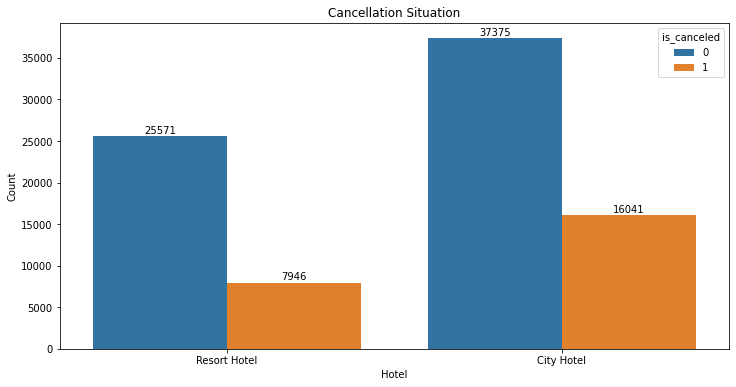

In [ ]:
# Check distribution cancellation situation from hotel
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x = 'hotel', hue='is_canceled')
plt.title('Cancellation Situation')
plt.xlabel('Hotel')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()+100), ha='center', va='bottom')

City Hotel has the highest canceled booked and also the highest that not canceled booked.

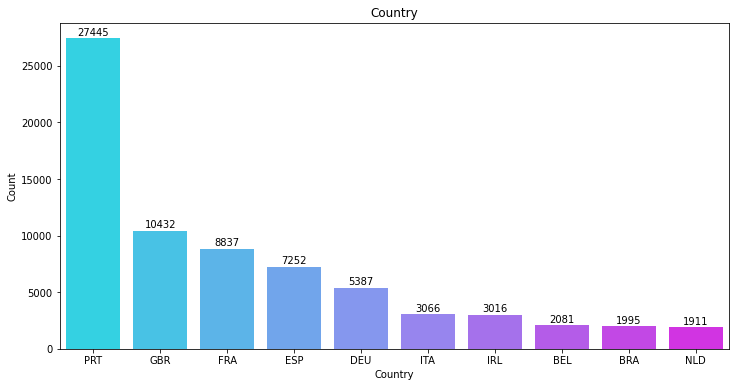

In [ ]:
# Check distribution country
plt.figure(figsize=(12,6))
df_country = df['country'].value_counts().nlargest(10).astype(int)
ax = sns.barplot(df_country.index, df_country.values, palette=reversed(sns.color_palette("cool_r", n_colors=10)))
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.4, p.get_height()+100), ha= 'center', va='bottom') 

PRT or Portugal has the most booking demand based on the data (more than 30%). It is pretty obvious because the dataset source locations are from hotels located in Portugal

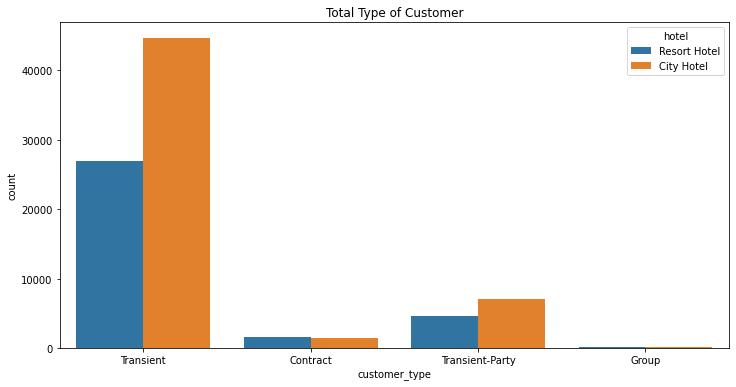

In [ ]:
# Check distribution special request
plt.figure(figsize=(12,6))
sns.countplot(x='customer_type', hue='hotel', data= df)
plt.title('Total Type of Customer')
plt.show()

Most customer type is Transient form both hotel

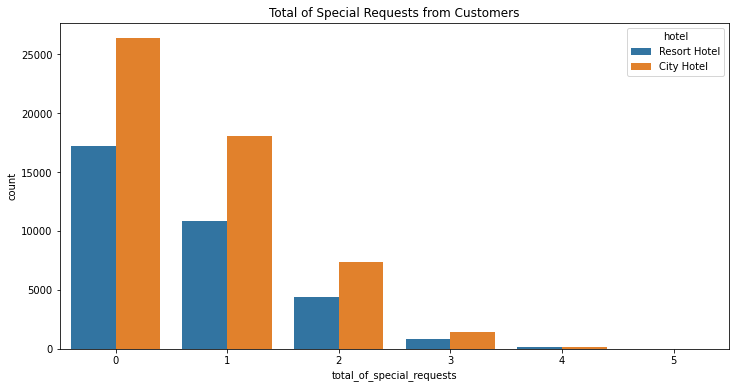

In [ ]:
# Check distribution special request
plt.figure(figsize=(12,6))
sns.countplot(x='total_of_special_requests', hue='hotel', data= df)
plt.title('Total of Special Requests from Customers')
plt.show()

Most customers don't make any special requests. It has a correlation with customer type. They don't ask for any additional requests because they are only transient customers.

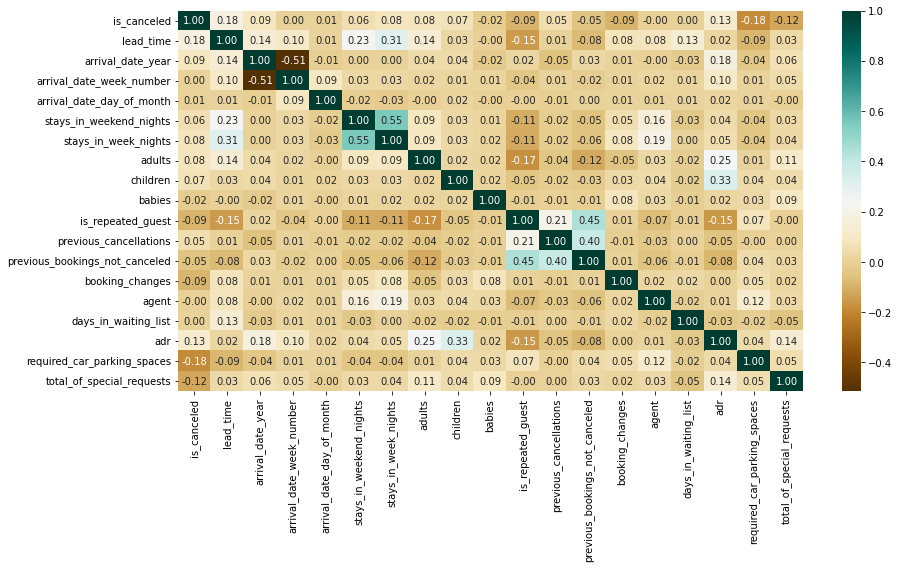

In [ ]:
# Check correlation heatmap
correlation = df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG')

There is no feature highly correlated each other

# Deep-Dive Exploration

## Business Question

1. What are the top 3 countries that guest cancel bookings?
2. What are the highest market segment that guest cancel bookings?
3. Which are the crucial months based on type hotel that guest cancel bookings?
4. Which month has the most guests who make repeated bookings?
5. How long the guest stay at the hotels? 
6. How much do guests pay for a room per night?
7. How many guests made repeated bookings but canceled it?
8. Are guests with children / babies make more bookings cancellations more than those without?

## Answer Data

### 1. Top 3 countries that cancel bookings

In [ ]:
# Filter is_canceled base on yes
Canceled = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
Canceled.columns = ['country', 'is_canceled']
Canceled

TopCountries = (Canceled
            .groupby(['country'])
            .agg(Canceled=('is_canceled', 'sum'))
            .reset_index()
            .sort_values('Canceled', ascending=False)
            .head(6)
            )
TopCountries

,country,Canceled
97,PRT,9787
41,GBR,1985
33,ESP,1862
38,FRA,1733
60,ITA,1075
27,DEU,1053


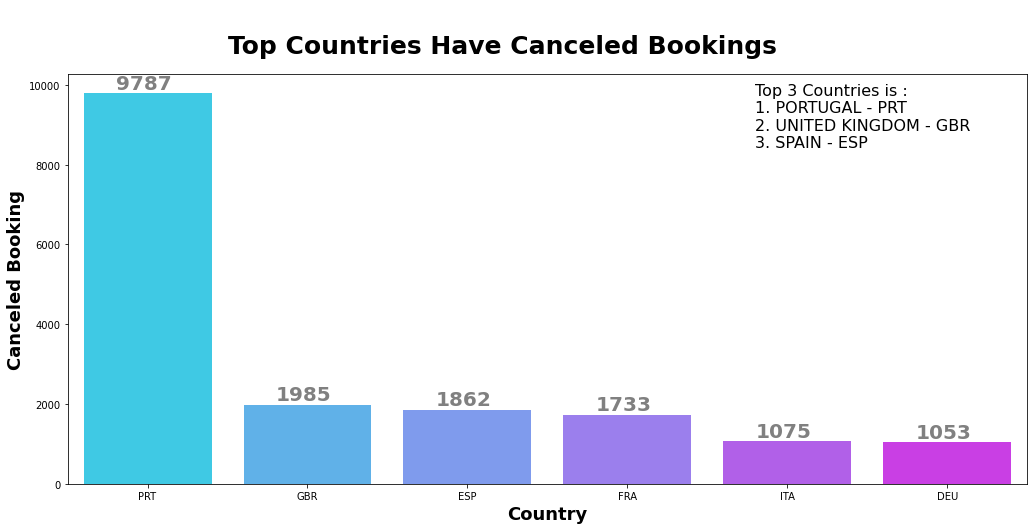

In [ ]:
# Check barplot
dfcountry = TopCountries
fig, ax = plt.subplots(figsize=(15,8))

g = sns.barplot(x ='country', y='Canceled', data=dfcountry, ax=ax,
               palette=reversed(sns.color_palette("cool_r", n_colors=6, desat=1))
               )

x = np.arange(len(dfcountry['country']))
y = dfcountry['Canceled']

for i, v in enumerate(y):
    ax.text(x[i]- 0.2, v+3, str(v), fontsize = 20, color='grey', fontweight='bold', va='bottom')

title = '''
Top Countries Have Canceled Bookings
'''
ax.text(0.5,10100,title,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')

insight = '''

Top 3 Countries is :
1. PORTUGAL - PRT
2. UNITED KINGDOM - GBR
3. SPAIN - ESP
'''
ax.text(3.8,8000,insight,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax.set_xlabel('Country', fontsize=18, fontweight='bold')
ax.set_ylabel('Canceled Booking', fontsize=18, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

3 Negara teratas dengan tamu yang paling banyak melakukan pembatalan pemesanan yaitu :
1. Portugal - PRT
2. United Kingdom - GBR
3. Spain - ESP

Karena sebagian besar tamu berasal dari negara PRT, maka cukup jelas untuk tamu yang melakukan pembatalan pesanan terbanyak yaitu sebesar 11% dari total distribusi keseluruhan dibandingkan dengan negara lainnya. Tetapi kita akan fokus terhadap 2 negara dibawahnya yaitu GBR dan ESP (lebih dari 3%) dari distribusi keseluruhan. Bagaimana untuk mencegah hal ini terjadi?

### 2. The highest market segment that cancel bookings

In [ ]:
# Filter is_canceled base on yes
Canceled = df[df['is_canceled'] == 1]['market_segment'].value_counts().reset_index()
Canceled.columns = ['market_segment', 'is_canceled']
Canceled

HighMS = (Canceled
            .groupby(['market_segment'])
            .agg(Canceled=('is_canceled', 'sum'))
            .reset_index()
            .sort_values('Canceled', ascending=False)
            .head(7)
            )
HighMS

,market_segment,Canceled
6,Online TA,18244
5,Offline TA/TO,2057
3,Direct,1723
4,Groups,1335
2,Corporate,497
1,Complementary,86
0,Aviation,45


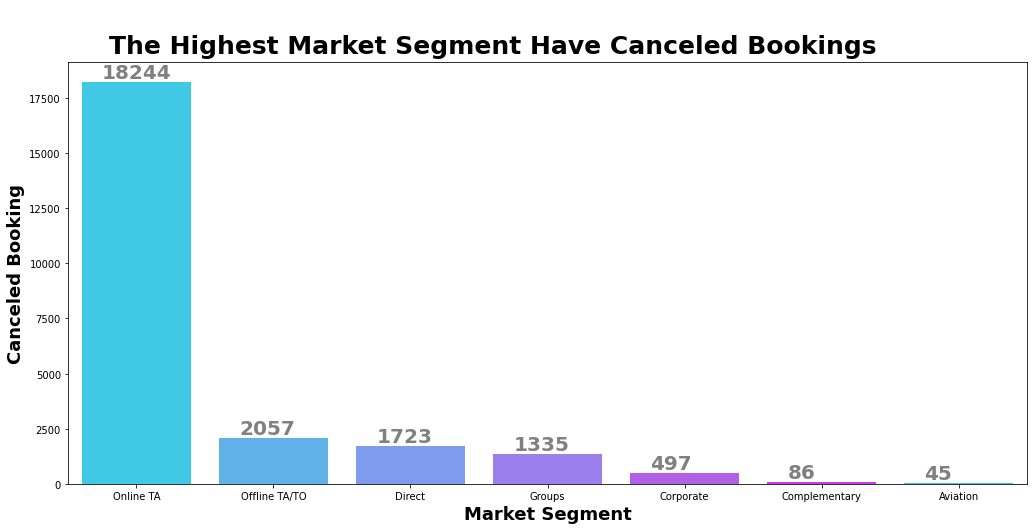

In [ ]:
# Check barplot
dfMS = HighMS
fig, ax = plt.subplots(figsize=(15,8))

g = sns.barplot(x ='market_segment', y='Canceled', data=dfMS, ax=ax,
               palette=reversed(sns.color_palette("cool_r", n_colors=6, desat=1))
               )

x = np.arange(len(dfMS['market_segment']))
y = dfMS['Canceled']

for i, v in enumerate(y):
    ax.text(x[i]- 0.25, v+3, str(v), fontsize = 20, color='grey', fontweight='bold', va='bottom')

title = '''
The Highest Market Segment Have Canceled Bookings
'''
ax.text(-0.2,18280,title,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')

ax.set_xlabel('Market Segment', fontsize=18, fontweight='bold')
ax.set_ylabel('Canceled Booking', fontsize=18, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

Telah kita ketahui dari gambar sebelumnya pada distribusi segmen pasar, untuk pemesanan hotel banyak dilakukan pada tamu yang menggunakan Online TA, tetapi dapat kita lihat dari gambar diatas, tidak sedikit juga untuk tamu melakukan pembatalan pada pemesanan yang menggunakan Online TA yaitu hampir 30%

### 3. The crucial months based on type hotel

In [ ]:
# Filter is_canceled base on yes and hotel on resort hotel
Canceled = df[(df['is_canceled'] == 1) & (df['hotel'] == 'Resort Hotel')]
Canceled

ResortHotel = (Canceled
            .groupby(['arrival_date_month'])
            .agg(CanceledResortHotel=('is_canceled', 'sum'))
            .reset_index()
            .head(12)
            )
ResortHotel

,arrival_date_month,CanceledResortHotel
0,April,655
1,August,1512
2,December,394
3,February,439
4,January,273
5,July,1294
6,June,832
7,March,464
8,May,696
9,November,307


In [ ]:
# Filter is_canceled base on yes hotel on city hotel
Canceled = df[(df['is_canceled'] == 1) & (df['hotel'] == 'City Hotel')]
Canceled

CityHotel = (Canceled
            .groupby(['arrival_date_month'])
            .agg(CanceledCityHotel=('is_canceled', 'count'))
            .reset_index()
            .head(12)
            )
CityHotel

,arrival_date_month,CanceledCityHotel
0,April,1749
1,August,2106
2,December,979
3,February,975
4,January,764
5,July,1898
6,June,1521
7,March,1365
8,May,1746
9,November,745


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=18e6235bf781db329725423e5eacb95297fad0e69eaff91a6946cde845535288
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=41ff76a8f52c361f14425a7e0a255f647703b8044db4bdc486cc5262762cc755
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
# Merge df ResortHotel and CityHotel based in month
final = ResortHotel.merge (CityHotel, on = 'arrival_date_month')
final = sort_month(final,'arrival_date_month')
final.columns= ['Month','Canceled Resort Hotel','Canceled City Hotel']
final

,Month,Canceled Resort Hotel,Canceled City Hotel
0,January,273,764
1,February,439,975
2,March,464,1365
3,April,655,1749
4,May,696,1746
5,June,832,1521
6,July,1294,1898
7,August,1512,2106
8,September,569,1067
9,October,511,1126


In [ ]:
# Melt df final
GuestCanceled = final.melt(
    id_vars='Month',
    var_name='Canceled Hotel',
    value_name='Total of Guest'
)
GuestCanceled

,Month,Canceled Hotel,Total of Guest
0,January,Canceled Resort Hotel,273
1,February,Canceled Resort Hotel,439
2,March,Canceled Resort Hotel,464
3,April,Canceled Resort Hotel,655
4,May,Canceled Resort Hotel,696
5,June,Canceled Resort Hotel,832
6,July,Canceled Resort Hotel,1294
7,August,Canceled Resort Hotel,1512
8,September,Canceled Resort Hotel,569
9,October,Canceled Resort Hotel,511


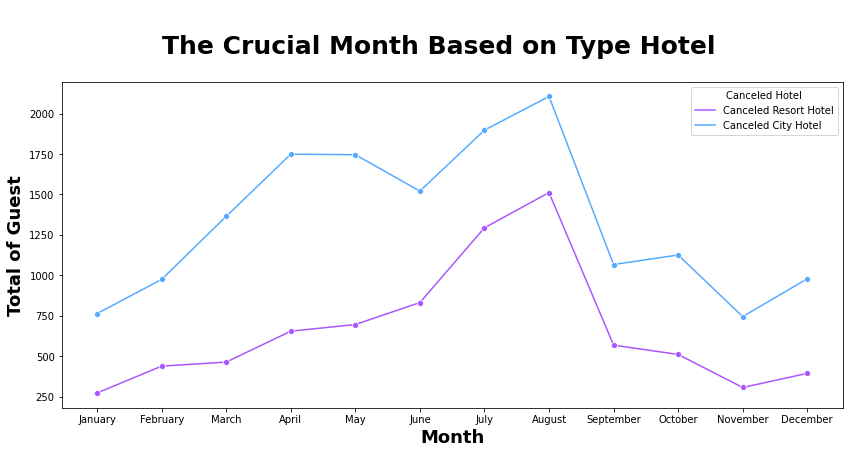

In [ ]:
# Check lineplot
fig, ax = plt.subplots(figsize=(14,6))
g = sns.lineplot(data=GuestCanceled, ax=ax,
             x='Month',
             y='Total of Guest',
             hue= 'Canceled Hotel',
             marker= 'o',
             palette = (sns.color_palette("cool_r", n_colors=2)))

title = '''
The Crucial Month Based on Type Hotel
'''
ax.text(1,2200,title,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')

ax.set_xlabel('Month', fontsize=18, fontweight='bold')
ax.set_ylabel('Total of Guest', fontsize=18, fontweight='bold')
plt.xticks()
plt.show()

1. Secara keseluruhan tamu yang melakukan pembatalan pemesanan terbanyak pada City Hotel dibandingkan dengan Resort Hotel
2. Bulan yang paling banyak mendapatkan tamu yang melakukan pembatalan pemesanan untuk kedua hotel tersebut yaitu di bulan Agustus
3. Seperti yang telah kita lihat, kedua hotel tersebut hampir memiliki distribusi yang serupa, yaitu setiap awal bulan sampai pertengahan semester selalu mengalami kenaikan pada tamu yang melakukan pembatalan pemesanan. Tetapi, setelah setelah melewati masa tsb, setiap bulannya mengalami penurunan yang drastis pada tamu yang melakukan pembatalan pemesanan hotel

### 4. The month has the most guests who make repeated bookings

In [ ]:
# Filter is_repeated_guest base on yes
Repeated = df[(df['is_repeated_guest'] == 1) & (df['is_canceled'] == 0)]
Repeated

RG = (Repeated
      .groupby(['arrival_date_month'])
      .agg(RepeatedGuest=('is_repeated_guest', 'sum'))
      .reset_index()
      .head(12)
      )
RG.columns= ['Month','Total of Guest']
RG

,Month,Total of Guest
0,April,252
1,August,147
2,December,266
3,February,353
4,January,373
5,July,180
6,June,262
7,March,407
8,May,318
9,November,257


In [ ]:
# Based in month
final2 = sort_month(RG,'Month')
final2.columns= ['Month','Total of Guest']
final2

,Month,Total of Guest
0,January,373
1,February,353
2,March,407
3,April,252
4,May,318
5,June,262
6,July,180
7,August,147
8,September,124
9,October,211


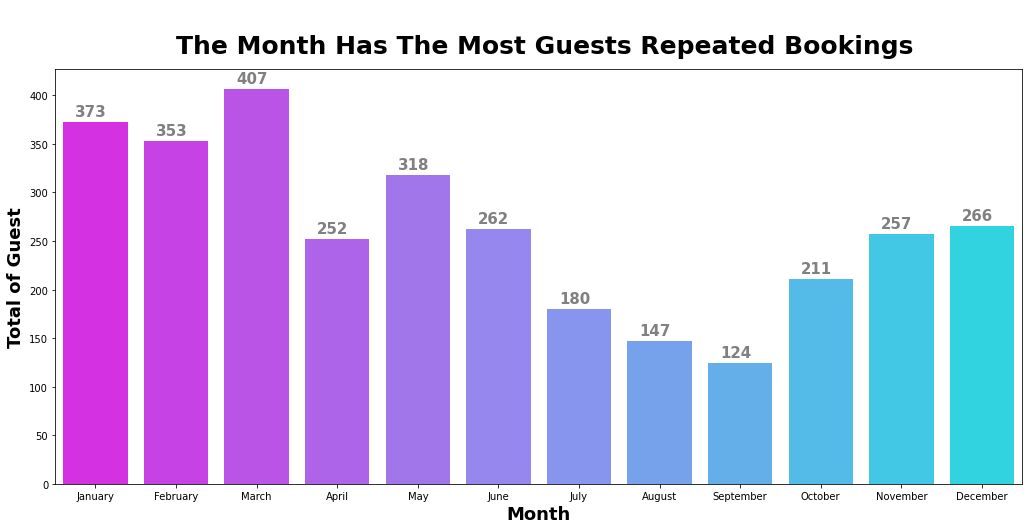

In [ ]:
# Check barplot
data=RG
fig, ax = plt.subplots(figsize=(15,8))
g = sns.barplot(
    data=final2, ax=ax,
    x="Month", y="Total of Guest", palette="cool_r")

x = np.arange(len(final2['Month']))
y = final2['Total of Guest']

for i, v in enumerate(y):
    ax.text(x[i]- 0.25, v+3, str(v), fontsize = 15, color='grey', fontweight='bold', va='bottom')

title = '''
The Month Has The Most Guests Repeated Bookings
'''
ax.text(1,415,title,horizontalalignment='left',color='black',fontsize=25,fontweight='bold')

ax.set_xlabel('Month', fontsize=18, fontweight='bold')
ax.set_ylabel('Total of Guest', fontsize=18, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

Tamu terbanyak yang melakukan pemesanan berulang - ulang terdapat pada bulan Maret dan tamu tersebut tidak melakukan pembatalan pemesanan pada hotel. tetapi berdasarkan distribusi pemesanan hotel, sangat sedikit untuk tamu yang melakukan pemesanan kembali. Maka bisa dikatakan sebagian besar tamu hanya berkunjung sekali pada kedua hotel tsb

### 5. Periode stay guests at the hotels

In [ ]:
# Filter is_canceled
filter = df['is_canceled'] == 0
data = df[filter]

# Make new column "TotalNight"
data['TotalNight'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,TotalNight
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
# Group by "TotalNight" and "hotel"
LongStay = (data
      .groupby(['TotalNight', 'hotel'])
      .agg(Stay=('is_canceled', 'count'))
      .reset_index()
      )

LongStay

,TotalNight,hotel,Stay
0,0,City Hotel,271
1,0,Resort Hotel,346
2,1,City Hotel,7984
3,1,Resort Hotel,5823
4,2,City Hotel,7639
...,...,...,...
61,46,Resort Hotel,1
62,48,City Hotel,1
63,49,City Hotel,1
64,56,Resort Hotel,1


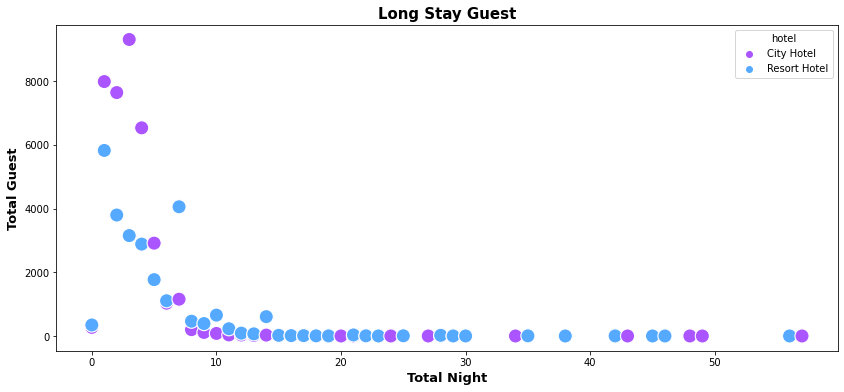

In [ ]:
# Check scatterplot
plt.figure(figsize=(14,6))
sns.scatterplot(x="TotalNight", y="Stay", hue="hotel",data=LongStay, palette="cool_r", s=200)

plt.title("Long Stay Guest", color='black', fontweight='bold', fontsize=15)
plt.xlabel("Total Night", color= 'black', fontweight='bold', fontsize=13)
plt.ylabel("Total Guest", color= 'black', fontweight='bold', fontsize=13)
plt.show()

Sebagian besar tamu yang melakukan pemesanan pada hotel rata-rata menginap sekitar 1-7 hari

### 6. The price to pay per night

In [ ]:
# Filter is_canceled
price = df['is_canceled'] == 0
dfprice = df[price]

# Make new column "Guest"
dfprice['Guest'] = dfprice['adults'] + dfprice['children']
dfprice = dfprice[["hotel", "reserved_room_type", "adr", 'Guest']].sort_values("reserved_room_type", ascending=True)
dfprice.head(16)

,hotel,reserved_room_type,adr,Guest
119389,City Hotel,A,151.20,2.0
45867,City Hotel,A,70.00,1.0
45868,City Hotel,A,70.00,1.0
45869,City Hotel,A,70.00,1.0
45871,City Hotel,A,70.00,1.0
45872,City Hotel,A,70.00,1.0
45874,City Hotel,A,70.00,1.0
45875,City Hotel,A,75.00,2.0
45866,City Hotel,A,75.00,2.0
45876,City Hotel,A,70.00,1.0


102.2796041051059


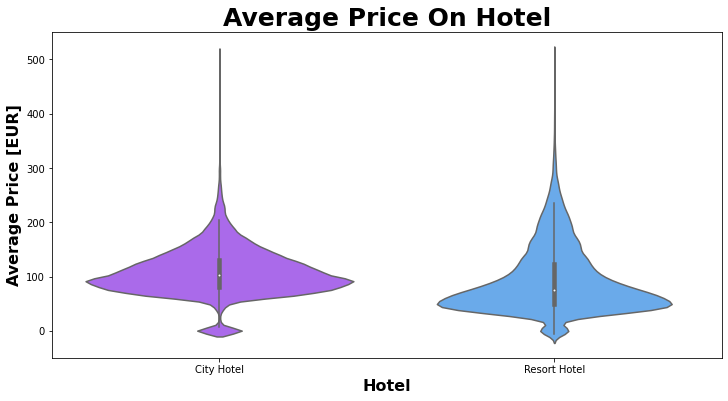

In [ ]:
# Check violinplot
plt.figure(figsize=(12,6))
sns.violinplot(data= dfprice,x = 'hotel', y='adr', palette="cool_r")

plt.title("Average Price On Hotel", color='black', fontweight='bold', fontsize=25)
plt.xlabel("Hotel", color= 'black', fontweight='bold', fontsize=16)
plt.ylabel("Average Price [EUR]", color= 'black', fontweight='bold', fontsize=16)

print(dfprice['adr'].mean())
plt.show()

Secara keseluruhan City Hotel memiliki harga tertinggi dengan rata-rata 90 [EUR] untuk menginap setiap tamu permalam nya dibandingkan dengan Resort Hotel dengan harga rata-rata 70 [EUR] permalam. mari kita lihat pada distribusi tipe kamarnya

102.2796041051059


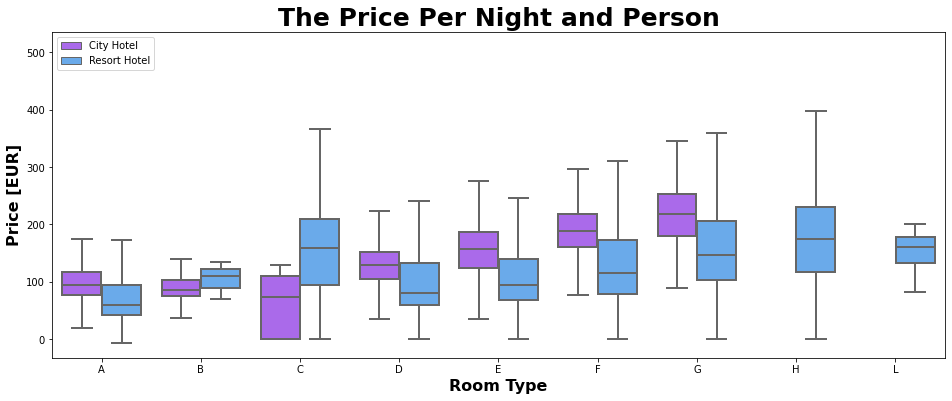

In [ ]:
# Check boxplot
plt.figure(figsize=(16,6))
sns.boxplot(x="reserved_room_type", y="adr", hue="hotel",data=dfprice, linewidth=2, palette="cool_r", fliersize=0)

plt.title("The Price Per Night and Person", color='black', fontweight='bold', fontsize=25)
plt.xlabel("Room Type", color= 'black', fontweight='bold', fontsize=16)
plt.ylabel("Price [EUR]", color= 'black', fontweight='bold', fontsize=16)

plt.legend(loc="upper left")
print(dfprice['adr'].mean())
plt.show()

1. Tipe kamar yang memiliki harga tertinggi pada City Hotel yaitu dengan tipe kamar "G"
2. Tipe kamar yang memiliki harga tertinggi pada Resort City yaitu dengan tipe kamar "H"
3. Secara keseluruhan semakin tinggi tipe kamar pada setiap hotel maka semakin tinggi harga untuk setiap malamnya

### 7. The guests has repeated booking but canceled it

In [ ]:
# Filter is_canceled and is_repeated_guest
RepeatedCancel = df[(df['is_canceled'] == 1) & (df['is_repeated_guest'] == 1)]

# Make new column "Guest"
RepeatedCancel['Guest'] = RepeatedCancel['adults'] + RepeatedCancel['children']
RepeatedCancel = RepeatedCancel[["hotel", 'Guest', 'is_repeated_guest', 'is_canceled']]
RepeatedCancel

,hotel,Guest,is_repeated_guest,is_canceled
14681,Resort Hotel,2.0,1,1
14777,Resort Hotel,2.0,1,1
14817,Resort Hotel,2.0,1,1
14823,Resort Hotel,2.0,1,1
14826,Resort Hotel,2.0,1,1
...,...,...,...,...
108829,City Hotel,1.0,1,1
111355,City Hotel,1.0,1,1
111924,City Hotel,1.0,1,1
111925,City Hotel,1.0,1,1


In [ ]:
# Group by "hotel" and "is_repeated_guest"
RC = (RepeatedCancel
      .groupby(['hotel', 'is_repeated_guest'])
      .agg(RepeatedCancel=('Guest', 'count'))
      .reset_index()
      .sort_values('RepeatedCancel', ascending=False)
      .head()
      )
RC

,hotel,is_repeated_guest,RepeatedCancel
0,City Hotel,1,189
1,Resort Hotel,1,72


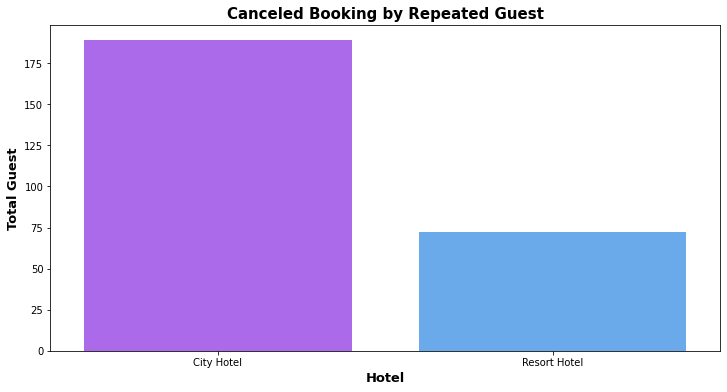

In [ ]:
# Check barplot
plt.figure(figsize=(12,6))
sns.barplot(x="hotel", y='RepeatedCancel', data=RC, linewidth=1, palette="cool_r")

plt.title("Canceled Booking by Repeated Guest", color='black', fontweight='bold', fontsize=15)
plt.xlabel("Hotel", color= 'black', fontweight='bold', fontsize=13)
plt.ylabel("Total Guest", color= 'black', fontweight='bold', fontsize=13)

plt.show()

Tamu terbanyak yang melakukan pembatalan pemesanan hotel dan nama tamu tersebut dari tamu yang melakukan pemesanan berulang - ulang yaitu pada tamu City Hotel dan tidak sedikit juga untuk tamu tersebut dari tamu Resort Hotel

### 8. Comparison between guest with children / babies and the without children / babies has canceled bookings

In [ ]:
# Filter is_canceled base on yes, adult, children and baby
FilterACB = df[(df['is_canceled'] == 1) & (df['adults'] > 0) & (df['children'] > 0) & (df['babies'] > 0)]
FilterACB['AllGuest'] = FilterACB['adults'] + FilterACB['children'] + FilterACB['babies'] 
FilterACB = FilterACB[['hotel', 'AllGuest']]
FilterACB.head()

,hotel,AllGuest
1339,Resort Hotel,4.0
1485,Resort Hotel,4.0
3574,Resort Hotel,5.0
5189,Resort Hotel,5.0
6681,Resort Hotel,4.0


In [ ]:
# Group by "hotel"
AllGuest = (FilterACB
            .groupby(['hotel'])
            .agg(AllGuest=('AllGuest', 'sum'))
            .reset_index()
            )
AllGuest

,hotel,AllGuest
0,City Hotel,57.0
1,Resort Hotel,85.0


In [ ]:
# Filter is_canceled base on yes and adult
FilterAdult = df[(df['is_canceled'] == 1) & (df['adults'] > 0) & (df['children'] == 0) & (df['babies'] == 0)]
FilterAdult['OnlyAdults'] = FilterAdult['adults']
FilterAdult = FilterAdult[['hotel', 'OnlyAdults']]
FilterAdult.head()

,hotel,OnlyAdults
8,Resort Hotel,2
9,Resort Hotel,2
10,Resort Hotel,2
27,Resort Hotel,2
32,Resort Hotel,2


In [ ]:
# Group by "hotel"
Adults = (FilterAdult
            .groupby(['hotel'])
            .agg(OnlyAdults=('OnlyAdults', 'sum'))
            .reset_index()
            )
Adults

,hotel,OnlyAdults
0,City Hotel,27938
1,Resort Hotel,12896


In [ ]:
# Merge df based in month
final = AllGuest.merge (Adults, on = 'hotel')
final.columns= ['Hotel','All Guest','Only Adults']
final

,Hotel,All Guest,Only Adults
0,City Hotel,57.0,27938
1,Resort Hotel,85.0,12896


Tamu yang mengidentifikasi hanya orang dewasa lebih banyak dibandingkan dengan tamu yang membawa anak kecil / bayi

## Conclutions

1. Sebagian besar tamu terbanyak yang melakukan pembatalan pemesanan itu berasal dari negara asal kedua hotel tsb yang berlokasi di Portugal dan pemesanan dilakukan melalui online oleh tamu tersebut. Begitu pun dengan negara lainnya seperti United Kondom, Spain, France dan negara lainnya dapat kita lihat tidak sedikit juga yang melakukan pembatalan pemesanan pada kedua hotel tsb. Tetapi, tamu untuk kedua hotel tsb yang melakukan pembatalan pemesanan terbanyak merupakan tamu dari Resort City dibandingkan dengan City Hotel. Setiap bulan pertama sampai pertengahan tahun, kondisi hotel tersebut selalu mengalami kenaikan untuk tamu yang melakukan pembatalan pemesanan dan tertinggi dibulan Agustus. Tetapi, setelah bulan Agustus sampai akhir tahun mengalami penurunan yang sangat signifikan untuk tamu tsb.
2. Pada bulan Maret, banyaknya tamu yang melakukan pemesanan berulang - ulang. Tetapi, berdasarkan distribusi pemesanan hotel, sangat sedikit untuk tamu yang melakukan pemesanan kembali. Maka bisa dikatakan sebagian besar tamu hanya berkunjung sekali pada kedua hotel tsb. Untuk  tamu yang menginap rata - rata sekitar 1 - 7 hari dengan harga setiap tamu permalamnya pada City Hotel sekitar 90 [EUR] dan Resort Hotel sekitar 70 [EUR] dan semakin tinggi tipe kamarnya pada masing - masing hotel, maka memiliki harga tertinggi.
3. Dapat kita lihat, sebagian besar tamu pada City Hotel merupakan tamu terbanyak yang melakukan pembatalan pemesanan dari tamu yang melakukan pemesanan berulang - ulang dibandingkan dengan Resort Hotel. Kebanyakan tamu tsb merupakan tamu yang berpasangan dan sangat jarang untuk tamu yang membawa anak - anak atau bayi.

## Recommendations

1. Perlu meningkatkan pada strategi pemasaran dan mempromosikan hotel lebih banyak lagi, terutama di media sosial karena kebanyakan customer melakukan pemesanan melalui online . Sehingga negara lainnya pun bisa melihat promosi yang sedang diadakan pada hotel tersebut. Pada bulan Juni - Agustus, karena City Hotel merupakan tamu yang melakukan pembatalan pemesanan terbanyak pada bulan tersebut maka dapat dilakukan dengan menurunkan harga untuk mencegah pembatalan sekaligus meningkatkan presentase pemesanan. Berlaku juga untuk Resort Hotel.
2. Sebagian besar tamu hanya berkunjung sekali, maka harus ditargetkan sedemikian rupa dengan memberikan manfaat khusus  jika mereka kembali lagi untuk menginap.
3. Sebagian besar tamu yang menginap yaitu tamu yang berpasangan, agar lebih menarik bisa melakukan iklan promosi untuk event - event tertentu yang berfokus pada tamu tsb.

# Modelling Machine Learning

## Baseline Model

In [ ]:
# Select only numerical columns
df_num = df.select_dtypes(include=["int","float"])
df_num.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.0,0,1


In [ ]:
# Feature + Target
X = df_num.drop('is_canceled', axis=1)
y = df_num['is_canceled']

In [ ]:
# Split data
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.2,
                                                random_state = 0)

### KNN + Evaluation

In [ ]:
# Fit - Train
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred_knn))
print('AUC Score :', roc_auc_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     12492
           1       0.48      0.36      0.41      4895

    accuracy                           0.71     17387
   macro avg       0.63      0.61      0.61     17387
weighted avg       0.69      0.71      0.70     17387

AUC Score : 0.6055568965567993


### Logistik Regression + Evaluation

In [ ]:
# Fit - Train
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predict
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred_reg))
print('AUC Score :', roc_auc_score(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83     12492
           1       0.55      0.12      0.20      4895

    accuracy                           0.73     17387
   macro avg       0.64      0.54      0.52     17387
weighted avg       0.68      0.73      0.66     17387

AUC Score : 0.5423936528775761


### Decision Tree + Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred_dt))
print('AUC Score :', roc_auc_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12492
           1       0.56      0.56      0.56      4895

    accuracy                           0.75     17387
   macro avg       0.69      0.69      0.69     17387
weighted avg       0.75      0.75      0.75     17387

AUC Score : 0.6936347086445847


### Random Forest + Evaluation

In [ ]:
# Fit - Train
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred_rf))
print('AUC Score :', roc_auc_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     12492
           1       0.72      0.53      0.61      4895

    accuracy                           0.81     17387
   macro avg       0.78      0.72      0.74     17387
weighted avg       0.80      0.81      0.80     17387

AUC Score : 0.7243520183867624


## Data Preprocessing

In [ ]:
dfhotel = df.copy()
dfhotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Check column categorical
df_categorical = dfhotel.select_dtypes(exclude=["int","float"])
df_categorical.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [ ]:
# See total of unique value
df_categorical.describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933,86933
unique,2,12,4,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14
freq,53416,11232,67555,27445,51540,69025,56183,46147,85789,71569,62946,211


Feature Transformation
1. Label Encoding (only 2 values) : `hotel`
2. One Hot Encoding (between 2 values & 5 values) : `deposit_type`, `reservation_status`, `meal` and `customer_type`
3. Frequency Encoding (>= 5 values) : `market_segment`, `distribution_channel`, `reserved_room_type` and `assigned_room_type`
4. Datetime Feature Engineering (datetime value) : `reservation_status_date`
5. Drop column (more than 15 values) : `arrival_date_month` and `country`

### Label Encoding

In [ ]:
# Apply label encoding
dfhotel['hotel'] = dfhotel['hotel'].astype('category').cat.codes
dfhotel.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
95464,0,0,156,2016,August,34,14,2,4,2,...,0,No Deposit,14.0,0,Transient,114.33,1,0,Check-Out,2016-08-20


### Ordinal Encoding

In [ ]:
# Use .map to replace value
map_DepoType = {'No Deposit':1,
                'Non Refund':2,
                'Refundable':3}
map_DepoType

dfhotel['deposit_type'] = dfhotel['deposit_type'].map(map_DepoType)
dfhotel.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
33400,1,0,41,2017,February,7,18,2,2,1,...,0,1,196.0,0,Transient-Party,43.0,0,0,Check-Out,2017-02-22


In [ ]:
# Use .map to replace value
map_ReservStatus = {'Check-Out':3,
                    'Canceled':2,
                    'No-Show':1}
map_ReservStatus

dfhotel['reservation_status'] = dfhotel['reservation_status'].map(map_ReservStatus)
dfhotel.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
87417,0,0,2,2016,April,17,17,2,1,2,...,1,1,0.0,0,Transient,99.0,0,0,3,2016-04-20


In [ ]:
# Use .map to replace value
map_Meal = {'SC':1,
            'BB':2,
            'HB':3,
            'FB':4}
map_Meal

dfhotel['meal'] = dfhotel['meal'].map(map_Meal)
dfhotel.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
32374,1,0,29,2017,January,3,21,2,2,2,...,0,1,0.0,0,Transient,44.0,0,3,3,2017-01-25


In [ ]:
# Use .map to replace value
map_CustomerType = {'Transient':1,
                    'Transient-Party':2,
                    'Contract':3,
                    'Group':4}
map_CustomerType

dfhotel['customer_type'] = dfhotel['customer_type'].map(map_CustomerType)
dfhotel.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
32447,1,0,0,2017,January,4,26,0,1,2,...,0,1,240.0,0,1,48.0,0,1,3,2017-01-27


### Frequency Encoding

In [ ]:
# Create Frekuensi and Percentage on 'market_segment'
freq = dfhotel['market_segment'].value_counts().reset_index()
freq.rename(columns={"index": "market_segment", "market_segment": "freq"}, inplace = True)
freq['%market_segment'] = round((freq['freq']/freq['freq'].sum())*100,2)
freq

,market_segment,freq,%market_segment
0,Online TA,51540,59.29
1,Offline TA/TO,13857,15.94
2,Direct,11647,13.40
3,Groups,4937,5.68
4,Corporate,4027,4.63
5,Complementary,698,0.80
6,Aviation,227,0.26


In [ ]:
# Merge dfhotel to encoding kolom 'market_segment'
dfhotel = dfhotel.merge(freq[['market_segment','%market_segment']], on='market_segment', how='inner')
dfhotel = dfhotel.drop(["market_segment"],axis = 1)
dfhotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,%market_segment
0,1,0,342,2015,July,27,1,0,0,2,...,1,0.0,0,1,0.0,0,0,3,2015-07-01,13.4
1,1,0,737,2015,July,27,1,0,0,2,...,1,0.0,0,1,0.0,0,0,3,2015-07-01,13.4
2,1,0,7,2015,July,27,1,0,1,1,...,1,0.0,0,1,75.0,0,0,3,2015-07-02,13.4
3,1,0,0,2015,July,27,1,0,2,2,...,1,0.0,0,1,107.0,0,0,3,2015-07-03,13.4
4,1,0,9,2015,July,27,1,0,2,2,...,1,303.0,0,1,103.0,0,1,3,2015-07-03,13.4


In [ ]:
# Create Frekuensi and Percentage on 'distribution_channel'
freq = dfhotel['distribution_channel'].value_counts().reset_index()
freq.rename(columns={"index": "distribution_channel", "distribution_channel": "freq"}, inplace = True)
freq['%distribution_channel'] = round((freq['freq']/freq['freq'].sum())*100,2)
freq

,distribution_channel,freq,%distribution_channel
0,TA/TO,69025,79.40
1,Direct,12827,14.76
2,Corporate,4899,5.64
3,GDS,181,0.21
4,Undefined,1,0.00


In [ ]:
# Merge dfhotel to encoding kolom 'distribution_channel'
dfhotel = dfhotel.merge(freq[['distribution_channel','%distribution_channel']], on='distribution_channel', how='inner')
dfhotel = dfhotel.drop(["distribution_channel"],axis = 1)
dfhotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,%market_segment,%distribution_channel
0,1,0,342,2015,July,27,1,0,0,2,...,0.0,0,1,0.0,0,0,3,2015-07-01,13.4,14.76
1,1,0,737,2015,July,27,1,0,0,2,...,0.0,0,1,0.0,0,0,3,2015-07-01,13.4,14.76
2,1,0,7,2015,July,27,1,0,1,1,...,0.0,0,1,75.0,0,0,3,2015-07-02,13.4,14.76
3,1,0,0,2015,July,27,1,0,2,2,...,0.0,0,1,107.0,0,0,3,2015-07-03,13.4,14.76
4,1,0,9,2015,July,27,1,0,2,2,...,303.0,0,1,103.0,0,1,3,2015-07-03,13.4,14.76


In [ ]:
# Create Frekuensi and Percentage on 'reserved_room_type'
freq = dfhotel['reserved_room_type'].value_counts().reset_index()
freq.rename(columns={"index": "reserved_room_type", "reserved_room_type": "freq"}, inplace = True)
freq['%reserved_room_type'] = round((freq['freq']/freq['freq'].sum())*100,2)
freq

,reserved_room_type,freq,%reserved_room_type
0,A,56183,64.63
1,D,17370,19.98
2,E,6011,6.91
3,F,2816,3.24
4,G,2041,2.35
5,B,995,1.14
6,C,914,1.05
7,H,596,0.69
8,L,6,0.01
9,P,1,0.00


In [ ]:
# Merge dfhotel to encoding kolom 'reserved_room_type'
dfhotel = dfhotel.merge(freq[['reserved_room_type','%reserved_room_type']], on='reserved_room_type', how='inner')
dfhotel = dfhotel.drop(["reserved_room_type"],axis = 1)
dfhotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,%market_segment,%distribution_channel,%reserved_room_type
0,1,0,342,2015,July,27,1,0,0,2,...,0,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05
1,1,0,737,2015,July,27,1,0,0,2,...,0,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05
2,1,0,0,2015,July,27,1,0,2,2,...,0,1,107.0,0,0,3,2015-07-03,13.4,14.76,1.05
3,1,0,9,2015,July,27,1,0,2,2,...,0,1,103.0,0,1,3,2015-07-03,13.4,14.76,1.05
4,1,0,1,2015,July,27,2,0,1,2,...,0,1,107.0,1,2,3,2015-07-03,13.4,14.76,1.05


In [ ]:
# Create Frekuensi and Percentage on 'assigned_room_type'
freq = dfhotel['assigned_room_type'].value_counts().reset_index()
freq.rename(columns={"index": "assigned_room_type", "assigned_room_type": "freq"}, inplace = True)
freq['%assigned_room_type'] = round((freq['freq']/freq['freq'].sum())*100,2)
freq

,assigned_room_type,freq,%assigned_room_type
0,A,46147,53.08
1,D,22276,25.62
2,E,7128,8.20
3,F,3607,4.15
4,G,2484,2.86
5,C,2144,2.47
6,B,1816,2.09
7,H,702,0.81
8,I,351,0.40
9,K,276,0.32


In [ ]:
# Merge dfhotel to encoding kolom 'assigned_room_type'
dfhotel = dfhotel.merge(freq[['assigned_room_type','%assigned_room_type']], on='assigned_room_type', how='inner')
dfhotel = dfhotel.drop(["assigned_room_type"],axis = 1)
dfhotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,%market_segment,%distribution_channel,%reserved_room_type,%assigned_room_type
0,1,0,342,2015,July,27,1,0,0,2,...,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05,2.47
1,1,0,737,2015,July,27,1,0,0,2,...,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05,2.47
2,1,0,0,2015,July,27,1,0,2,2,...,1,107.0,0,0,3,2015-07-03,13.4,14.76,1.05,2.47
3,1,0,9,2015,July,27,1,0,2,2,...,1,103.0,0,1,3,2015-07-03,13.4,14.76,1.05,2.47
4,1,0,1,2015,July,27,2,0,1,2,...,1,107.0,1,2,3,2015-07-03,13.4,14.76,1.05,2.47


In [ ]:
# Drop column arrival_date_month and country
dfhotel = dfhotel.drop(["arrival_date_month"],axis = 1)
dfhotel = dfhotel.drop(["country"],axis = 1)
dfhotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,%market_segment,%distribution_channel,%reserved_room_type,%assigned_room_type
0,1,0,342,2015,27,1,0,0,2,0.0,...,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05,2.47
1,1,0,737,2015,27,1,0,0,2,0.0,...,1,0.0,0,0,3,2015-07-01,13.4,14.76,1.05,2.47
2,1,0,0,2015,27,1,0,2,2,0.0,...,1,107.0,0,0,3,2015-07-03,13.4,14.76,1.05,2.47
3,1,0,9,2015,27,1,0,2,2,0.0,...,1,103.0,0,1,3,2015-07-03,13.4,14.76,1.05,2.47
4,1,0,1,2015,27,2,0,1,2,2.0,...,1,107.0,1,2,3,2015-07-03,13.4,14.76,1.05,2.47


### Datetime Feature Engineering

In [ ]:
# Transform reservation_status_date column to datetime
dfhotel['reservation_status_date'] = pd.to_datetime(dfhotel['reservation_status_date'])

dfhotel['year'] = dfhotel['reservation_status_date'].dt.year
dfhotel['month'] = dfhotel['reservation_status_date'].dt.month
dfhotel['day'] = dfhotel['reservation_status_date'].dt.day
dfhotel = dfhotel.drop(["reservation_status_date"], axis = 1)
dfhotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,reservation_status,%market_segment,%distribution_channel,%reserved_room_type,%assigned_room_type,year,month,day
0,1,0,342,2015,27,1,0,0,2,0.0,...,0,0,3,13.40,14.76,1.05,2.47,2015,7,1
1,1,0,737,2015,27,1,0,0,2,0.0,...,0,0,3,13.40,14.76,1.05,2.47,2015,7,1
2,1,0,0,2015,27,1,0,2,2,0.0,...,0,0,3,13.40,14.76,1.05,2.47,2015,7,3
3,1,0,9,2015,27,1,0,2,2,0.0,...,0,1,3,13.40,14.76,1.05,2.47,2015,7,3
4,1,0,1,2015,27,2,0,1,2,2.0,...,1,2,3,13.40,14.76,1.05,2.47,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86928,0,0,5,2017,9,2,0,1,2,0.0,...,0,0,3,59.29,79.40,3.24,0.32,2017,3,3
86929,0,0,48,2016,9,21,2,4,0,0.0,...,0,0,3,13.40,14.76,1.14,0.32,2016,2,27
86930,0,0,22,2016,48,26,0,0,1,1.0,...,0,1,3,4.63,14.76,1.14,0.32,2016,11,26
86931,1,1,0,2015,29,17,0,1,2,0.0,...,0,0,2,13.40,14.76,0.01,0.00,2015,7,17


### Multicolinearity Handling

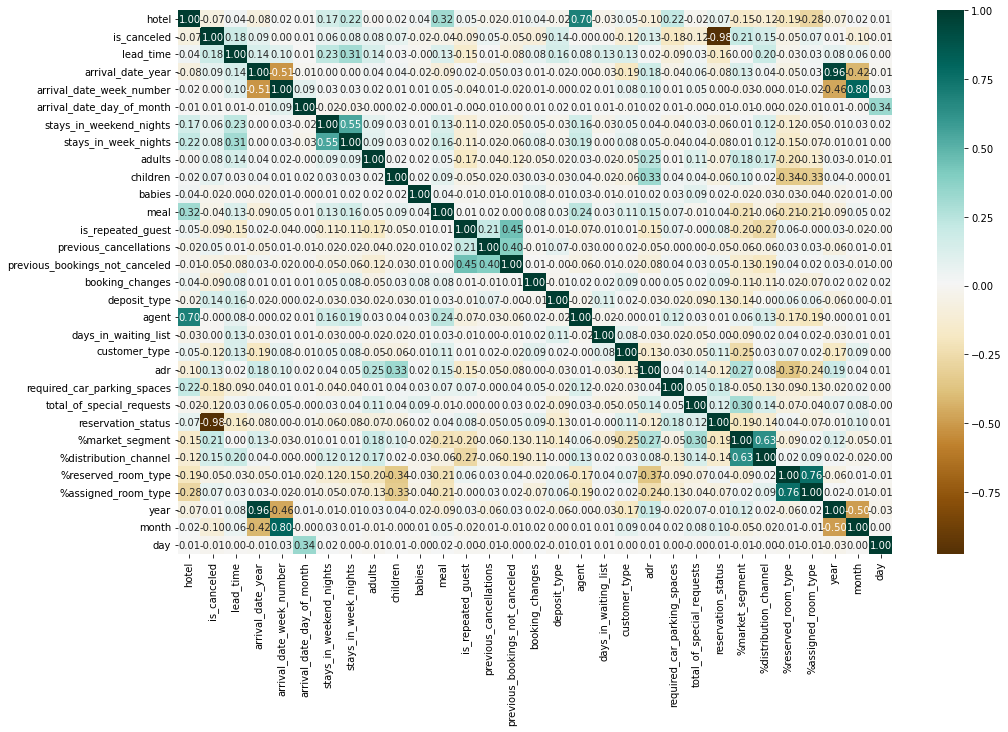

In [ ]:
corr_= dfhotel.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BrBG")

In [ ]:
cancel_corr = dfhotel.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

reservation_status                0.975300
%market_segment                   0.205715
required_car_parking_spaces       0.183723
lead_time                         0.183696
%distribution_channel             0.150305
deposit_type                      0.137401
adr                               0.126663
total_of_special_requests         0.121816
customer_type                     0.117773
month                             0.099669
booking_changes                   0.094071
is_repeated_guest                 0.090156
arrival_date_year                 0.087655
stays_in_week_nights              0.082776
adults                            0.080254
%assigned_room_type               0.070893
hotel                             0.068852
children                          0.067013
stays_in_weekend_nights           0.059567
previous_cancellations            0.050962
previous_bookings_not_canceled    0.050559
%reserved_room_type               0.045872
meal                              0.038604
babies     

In [ ]:
dfhotel = dfhotel.drop(['agent', '%reserved_room_type', '%assigned_room_type', 'arrival_date_week_number', 'arrival_date_year', 'arrival_date_day_of_month', 'reservation_status'], axis=1)
dfhotel

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,is_repeated_guest,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,%market_segment,%distribution_channel,year,month,day
0,1,0,342,0,0,2,0.0,0,2,0,...,0,1,0.00,0,0,13.40,14.76,2015,7,1
1,1,0,737,0,0,2,0.0,0,2,0,...,0,1,0.00,0,0,13.40,14.76,2015,7,1
2,1,0,0,0,2,2,0.0,0,2,0,...,0,1,107.00,0,0,13.40,14.76,2015,7,3
3,1,0,9,0,2,2,0.0,0,4,0,...,0,1,103.00,0,1,13.40,14.76,2015,7,3
4,1,0,1,0,1,2,2.0,0,2,0,...,0,1,107.00,1,2,13.40,14.76,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86928,0,0,5,0,1,2,0.0,0,2,0,...,0,2,198.00,0,0,59.29,79.40,2017,3,3
86929,0,0,48,2,4,0,0.0,0,1,0,...,0,2,56.27,0,0,13.40,14.76,2016,2,27
86930,0,0,22,0,0,1,1.0,0,2,0,...,0,2,0.00,0,1,4.63,14.76,2016,11,26
86931,1,1,0,0,1,2,0.0,0,2,0,...,0,1,8.00,0,0,13.40,14.76,2015,7,17


In [ ]:
dfhotel.shape

(86933, 24)

### Feature + Target

In [ ]:
X = dfhotel.drop('is_canceled', axis=1)
y = dfhotel['is_canceled']

### Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

### Split Data

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 0)

## Model Improvement

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Logistik Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluation

In [ ]:
# Predict KNN
y_pred_knn = knn.predict(X_test)

# Predict Logreg
y_pred_reg = logreg.predict(X_test)

# Predict Decision Tree
y_pred_dt = dt.predict(X_test)

# Predict Random Forest
y_pred_rf = rf.predict(X_test)

### KNN

In [ ]:
# classification report
print(classification_report(y_test, y_pred_knn))
print('AUC Score :', roc_auc_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     12651
           1       0.70      0.54      0.61      4736

    accuracy                           0.81     17387
   macro avg       0.77      0.73      0.75     17387
weighted avg       0.81      0.81      0.81     17387

AUC Score : 0.7294732419534189


### Logistik Regression

In [ ]:
# classification report
print(classification_report(y_test, y_pred_reg))
print('AUC Score :', roc_auc_score(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     12651
           1       0.73      0.43      0.54      4736

    accuracy                           0.80     17387
   macro avg       0.77      0.68      0.71     17387
weighted avg       0.79      0.80      0.78     17387

AUC Score : 0.6845164050032365


### Decision Tree

In [ ]:
# classification report
print(classification_report(y_test, y_pred_dt))
print('AUC Score :', roc_auc_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     12651
           1       0.66      0.67      0.66      4736

    accuracy                           0.82     17387
   macro avg       0.77      0.77      0.77     17387
weighted avg       0.82      0.82      0.82     17387

AUC Score : 0.7697079582695097


### Random Forest

In [ ]:
# classification report
print(classification_report(y_test, y_pred_rf))
print('AUC Score :', roc_auc_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12651
           1       0.85      0.63      0.72      4736

    accuracy                           0.87     17387
   macro avg       0.86      0.79      0.82     17387
weighted avg       0.87      0.87      0.86     17387

AUC Score : 0.7936379965823661


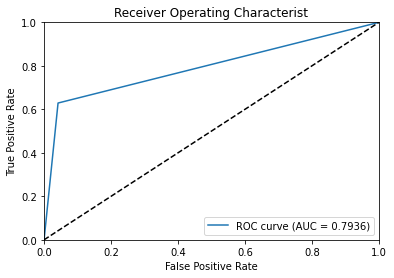

In [ ]:
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_rf)
plotRoc(fpr, tpr, auc)

## Hyperparameter Tuning

In [ ]:
dfhotel['is_canceled'].value_counts()

0    62946
1    23987
Name: is_canceled, dtype: int64

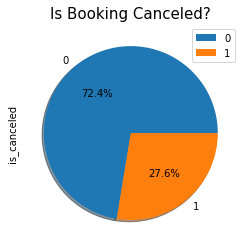

In [ ]:
dfhotel["is_canceled"].value_counts().plot(kind="pie", autopct="%1.1f%%", shadow=True)
plt.legend()
plt.title('Is Booking Canceled?', fontsize=15)
plt.show()

Imbalance Data, it means not valid using accuracy. We can use AUC or F1-Score

In [ ]:
# Function plot AUC
def plotRoc(fpr, tpr, auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterist')
    plt.legend(loc="lower right")
    plt.show()

### KNN

In [ ]:
X = dfhotel.drop(columns='is_canceled').to_numpy()
y = dfhotel[['is_canceled']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# hyperparameter tuning
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

knn_clf_gridcv = GridSearchCV(knn, parameters, cv=5, scoring='f1')
knn_clf_gridcv.fit(X_train, y_train)

CPU times: user 18min 29s, sys: 56.3 s, total: 19min 26s
Wall time: 16min 15s


In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.491221,1
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.479861,2
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.476279,3
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.464966,4
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.463305,5
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.458024,6
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.452006,7
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.451018,8
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.440394,9
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.425081,10


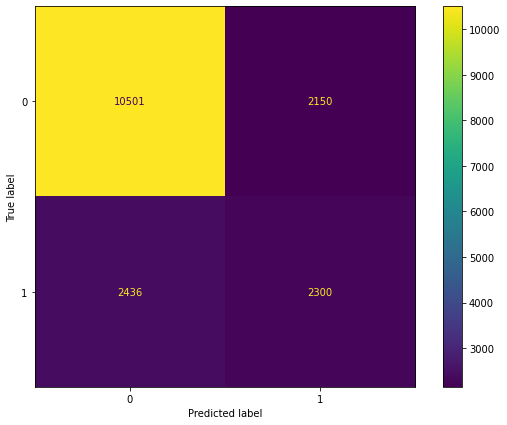

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC Score :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     12651
           1       0.52      0.49      0.50      4736

    accuracy                           0.74     17387
   macro avg       0.66      0.66      0.66     17387
weighted avg       0.73      0.74      0.73     17387

AUC Score : 0.6578474260660945


### Logistik Regression

In [ ]:
# hyperparameter tuning
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'solver': ('newton-cg','lbfgs','sag', 'saga'),
    'C' : (1, 5, 10, 20, 30, 50)
}

logreg_gridcv = GridSearchCV(logreg, parameters, cv=5, scoring='f1')
logreg_gridcv.fit(X_train, y_train)

CPU times: user 10min 51s, sys: 8min 8s, total: 18min 59s
Wall time: 11min


In [ ]:
# the results
cv_result = pd.DataFrame(logreg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'C': 1, 'solver': 'newton-cg'}",0.525396,1
8,"{'C': 10, 'solver': 'newton-cg'}",0.522666,2
12,"{'C': 20, 'solver': 'newton-cg'}",0.521917,3
16,"{'C': 30, 'solver': 'newton-cg'}",0.521884,4
20,"{'C': 50, 'solver': 'newton-cg'}",0.521641,5
4,"{'C': 5, 'solver': 'newton-cg'}",0.521115,6
17,"{'C': 30, 'solver': 'lbfgs'}",0.329384,7
13,"{'C': 20, 'solver': 'lbfgs'}",0.324519,8
5,"{'C': 5, 'solver': 'lbfgs'}",0.320464,9
9,"{'C': 10, 'solver': 'lbfgs'}",0.319709,10


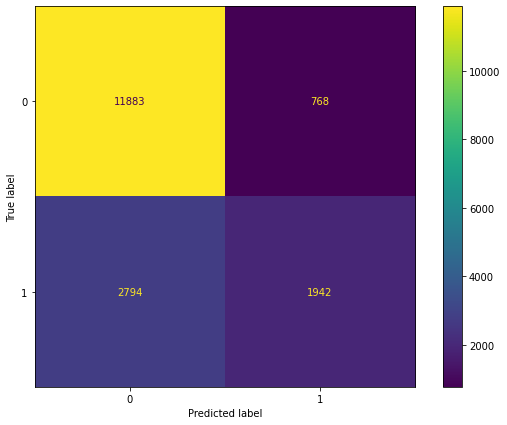

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = logreg_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=logreg_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logreg_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = logreg_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC Score :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     12651
           1       0.72      0.41      0.52      4736

    accuracy                           0.80     17387
   macro avg       0.76      0.67      0.70     17387
weighted avg       0.78      0.80      0.77     17387

AUC Score : 0.6746720060854072


### Decision Tree

In [ ]:
# hyperparameter tuning
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_gridcv = GridSearchCV(dt, parameters, cv=5, scoring='f1')
dt_gridcv.fit(X_train, y_train)

CPU times: user 44 s, sys: 137 ms, total: 44.2 s
Wall time: 44 s


In [ ]:
# the results
cv_result = pd.DataFrame(dt_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
21,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.662828,1
22,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.662380,2
46,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.661631,3
20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.660732,4
45,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.659822,5
47,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.659617,6
48,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.644555,7
23,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.641895,8
49,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.630186,9
24,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.621563,10


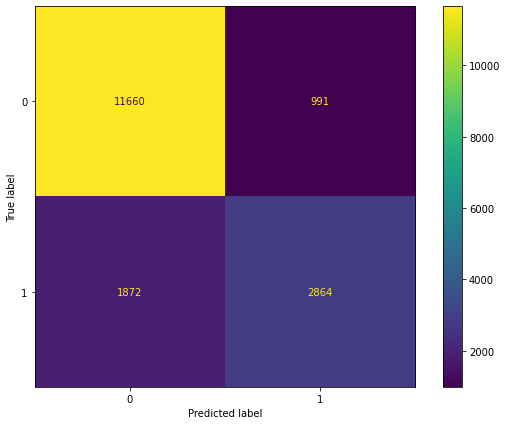

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_gridcv.best_estimator_.classes_)

disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = dt_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC Score :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12651
           1       0.74      0.60      0.67      4736

    accuracy                           0.84     17387
   macro avg       0.80      0.76      0.78     17387
weighted avg       0.83      0.84      0.83     17387

AUC Score : 0.7631980005853612


### Random Forest

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (60,70,80,90,100),
    'max_depth':(5,10,15,20,25)
}


rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='f1')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 8min 4s, sys: 29.8 s, total: 8min 34s
Wall time: 8min 34s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
22,"{'max_depth': 25, 'n_estimators': 80}",0.707740,1
23,"{'max_depth': 25, 'n_estimators': 90}",0.707151,2
21,"{'max_depth': 25, 'n_estimators': 70}",0.707005,3
24,"{'max_depth': 25, 'n_estimators': 100}",0.706809,4
20,"{'max_depth': 25, 'n_estimators': 60}",0.705533,5
18,"{'max_depth': 20, 'n_estimators': 90}",0.681511,6
19,"{'max_depth': 20, 'n_estimators': 100}",0.681480,7
17,"{'max_depth': 20, 'n_estimators': 80}",0.680971,8
16,"{'max_depth': 20, 'n_estimators': 70}",0.680401,9
15,"{'max_depth': 20, 'n_estimators': 60}",0.679487,10


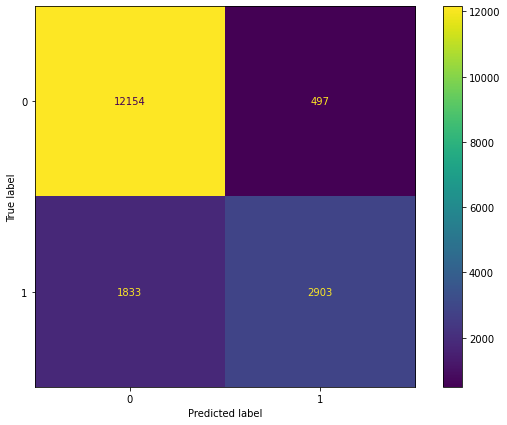

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print('AUC Score :', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12651
           1       0.85      0.61      0.71      4736

    accuracy                           0.87     17387
   macro avg       0.86      0.79      0.81     17387
weighted avg       0.86      0.87      0.86     17387

AUC Score : 0.7868395475226827


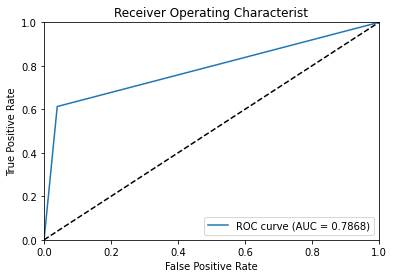

In [ ]:
import sklearn
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)
plotRoc(fpr, tpr, auc)

## Features Importance

In [ ]:
var_columns = [c for c in dfhotel if c not in ['is_canceled']]
X = dfhotel.loc[:,var_columns]
y = dfhotel.loc[:,'is_canceled']

In [ ]:
model_rf = RandomForestClassifier(max_depth=25,
                                  n_estimators=80)
model_rf.fit(X, y)

RandomForestClassifier(max_depth=25, n_estimators=80)

### Partial Dependence Plot

In [ ]:
df_var_imp = pd.DataFrame({'Variable': var_columns,
                           'Importance': model_rf.feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

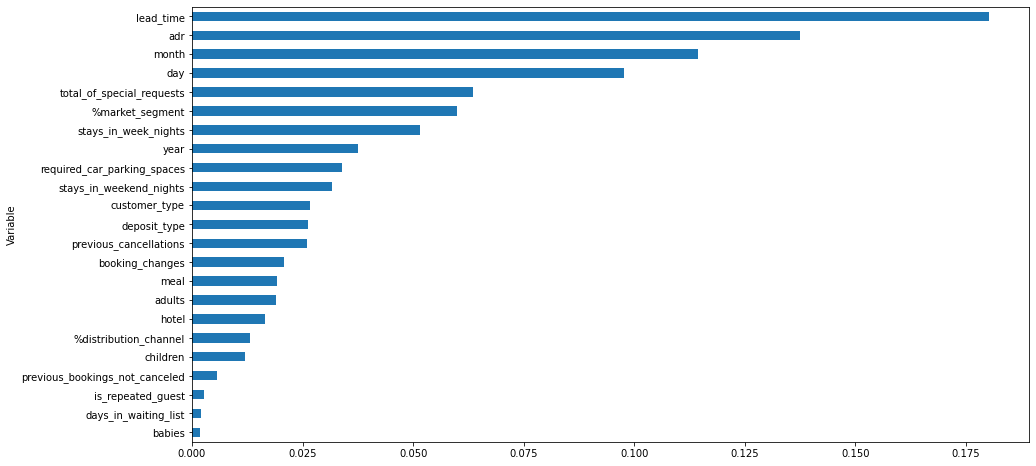

In [ ]:
df_var_imp[:24].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,8), legend=False)

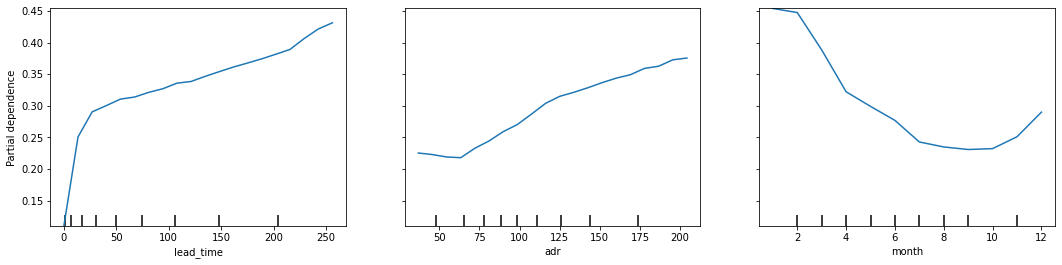

In [ ]:
from sklearn.inspection import plot_partial_dependence
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(model_rf, X, ['lead_time','adr','month'],
                        grid_resolution=20, ax=ax);